In [92]:
greetings = "Assalam-o-Alaikum!"
print(greetings)

Assalam-o-Alaikum!


### Import Libraries

In [93]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

### Import Juice Dataset

In [94]:
df = pd.read_csv("juice.csv")
df[::40]

,class_label,class_name,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline
0,1,Barolo,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
40,1,Barolo,13.56,1.71,2.31,16.2,117,3.15,3.29,0.34,2.34,6.13,0.95,3.38,795
80,2,Grignolino,12.00,0.92,2.00,19.0,86,2.42,2.26,0.30,1.43,2.50,1.38,3.12,278
120,2,Grignolino,11.45,2.40,2.42,20.0,96,2.90,2.79,0.32,1.83,3.25,0.80,3.39,625
160,3,Barbera,12.36,3.83,2.38,21.0,88,2.30,0.92,0.50,1.04,7.65,0.56,1.58,520


In [95]:
samples = df[["total_phenols", "od280"]]
samples[::40]

,total_phenols,od280
0,2.80,3.92
40,3.15,3.38
80,2.42,3.12
120,2.90,3.39
160,2.30,1.58


In [96]:
model = PCA()

model.fit(samples)

transformed = model.transform(samples)

transformed[::40]

array([[-1.32771994,  0.45139607],
       [-1.13773136, -0.16342451],
       [-0.47015527,  0.23007539],
       [-0.98511371,  0.03483758],
       [ 0.78858331, -0.66523305]])

In [97]:
# Principal components
model.components_

array([[-0.64116665, -0.76740167],
       [-0.76740167,  0.64116665]])

### Import Seeds Dataset

In [98]:
dfs = pd.read_csv("seedswl.csv")
dfs[::40]

,Width,Length
0,3.312,5.763
40,3.156,5.348
80,3.467,5.875
120,3.962,6.315
160,2.879,5.451
200,2.989,5.219


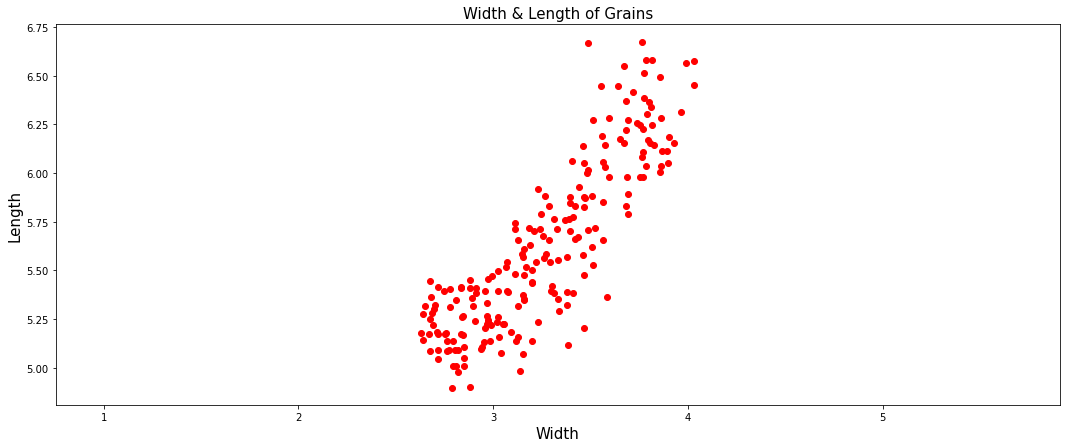

In [99]:
# Assign the 0th column of grains: width
width = dfs["Width"]

# Assign the 1st column of grains: length
length = dfs["Length"]

# Scatter plot width vs length
plt.figure(figsize = (18, 7))
plt.scatter(width, length, c ="red")
plt.axis("equal")
plt.title("Width & Length of Grains", size = 15)
plt.xlabel("Width", size = 15)
plt.ylabel("Length", size = 15)
plt.show()

In [100]:
# Correlation
correlation, pvalue = pearsonr(width, length)
print(correlation)

0.8604149377143462


### Decorrelating the grain measurements with PCA

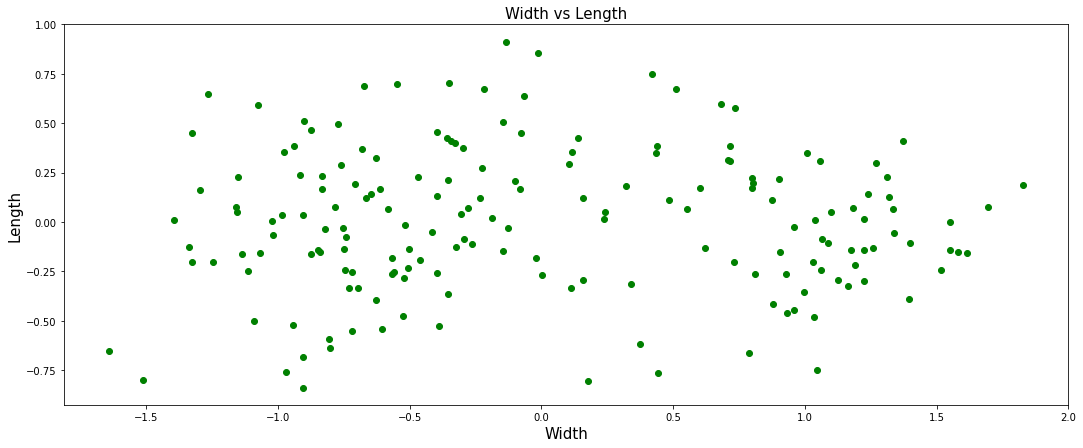

In [101]:
# Create PCA instance: model
model = PCA()

# Apply the fit_transform method of model to grains: pca_features
pca_features = model.fit_transform(samples)

# Assign 0th column of pca_features: Width
width = pca_features[:, 0]

## Assign 1st column of pca_features: Length
length = pca_features[:, 1]

# Scatter plot Width vs Length
plt.figure(figsize = (18, 7))
plt.scatter(width, length, color = "green")
plt.title("Width vs Length", size = 15)
plt.xlabel("Width", size = 15)
plt.ylabel("Length", size = 15)
plt.show()

In [102]:
# Correlation
correlation, pvalue = pearsonr(width, length)
print(correlation)

-1.3183898417423734e-16


### Import Iris Dataset

In [103]:
iris = pd.read_csv("iris.csv")
iris[::40]

,sepal length,sepal width,petal length,petal width,variety
0,5.1,3.5,1.4,0.2,Setosa
40,5.0,3.5,1.3,0.3,Setosa
80,5.5,2.4,3.8,1.1,Versicolor
120,6.9,3.2,5.7,2.3,Virginica


In [104]:
data = iris[iris["variety"] == "Versicolor"]
data[::20]

,sepal length,sepal width,petal length,petal width,variety
50,7.0,3.2,4.7,1.4,Versicolor
70,5.9,3.2,4.8,1.8,Versicolor
90,5.5,2.6,4.4,1.2,Versicolor


In [105]:
samples = data[["sepal length", "sepal width", "petal width"]]
samples[::20]

,sepal length,sepal width,petal width
50,7.0,3.2,1.4
70,5.9,3.2,1.8
90,5.5,2.6,1.2


### Dimension reduction with PCA

In [106]:
samples = iris[iris.columns.drop("variety")]
species = iris["variety"].unique()

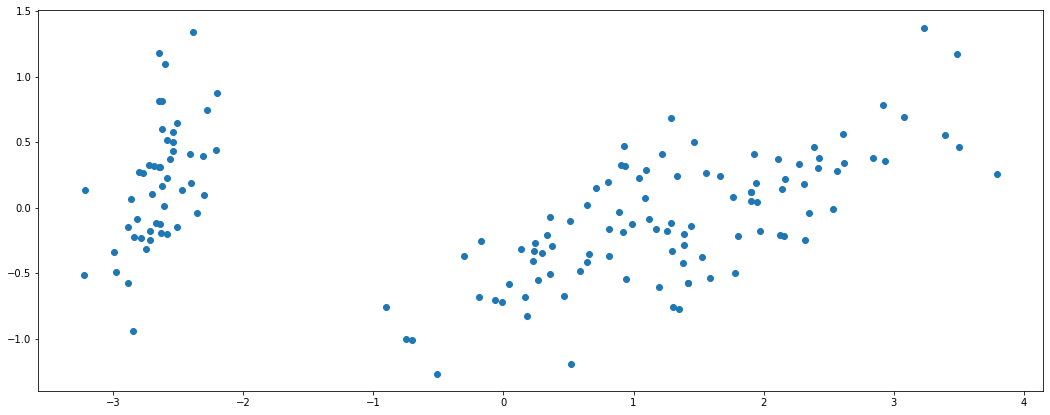

In [107]:
pca = PCA(n_components = 2)

pca.fit(samples)

transformed = pca.transform(samples)

sl = transformed[:, 0]
sw = transformed[:, 1]

plt.figure(figsize = (18, 7))
plt.scatter(sl, sw)
plt.show()

### Intrinsic Dimensions

In [108]:
pca = PCA()

pca.fit(samples)

features = range(pca.n_components_)
features

range(0, 4)

In [109]:
pca.explained_variance_

array([4.22824171, 0.24267075, 0.0782095 , 0.02383509])

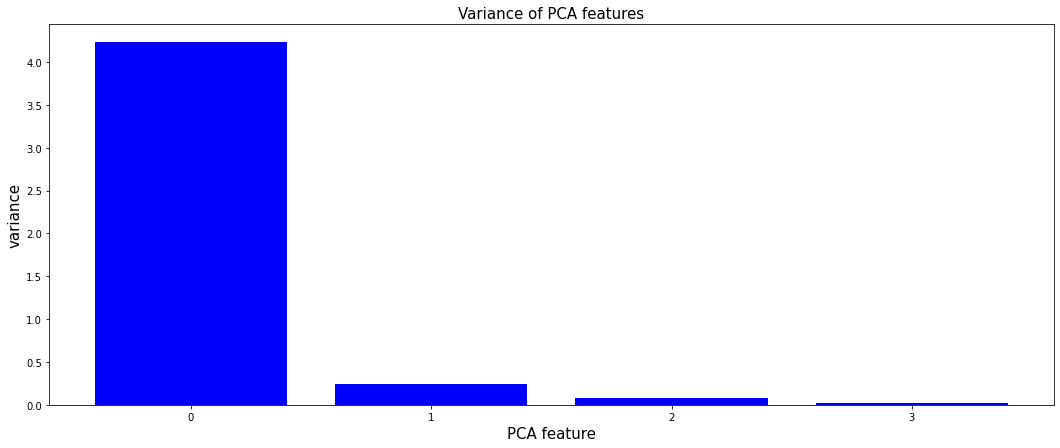

In [110]:
plt.figure(figsize = (18, 7))
plt.bar(features, pca.explained_variance_, color = "blue")
plt.xticks(features)
plt.title("Variance of PCA features", size = 15)
plt.ylabel("variance", size = 15)
plt.xlabel("PCA feature", size = 15)
plt.show()

### The first principal component :Grain

In [111]:
grains = pd.read_csv("seedswl.csv")
grains[::40]

,Width,Length
0,3.312,5.763
40,3.156,5.348
80,3.467,5.875
120,3.962,6.315
160,2.879,5.451
200,2.989,5.219


In [112]:
gw = grains["Width"]
gl = grains["Length"]

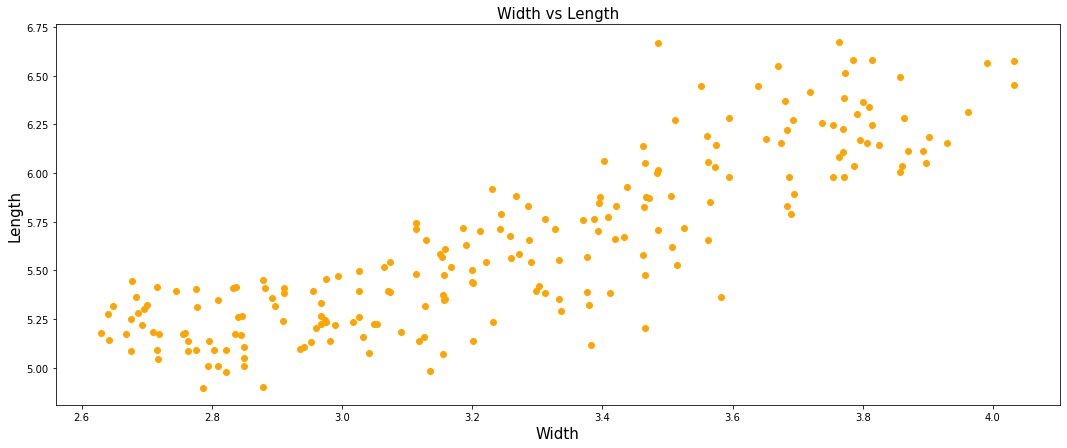

In [113]:
# Make a scatter plot of the untransformed points
plt.figure(figsize = (18, 7))
plt.scatter(gw, gl, color = "orange")
plt.title("Width vs Length", size = 15)
plt.xlabel("Width", size = 15)
plt.ylabel("Length", size = 15)
plt.show()

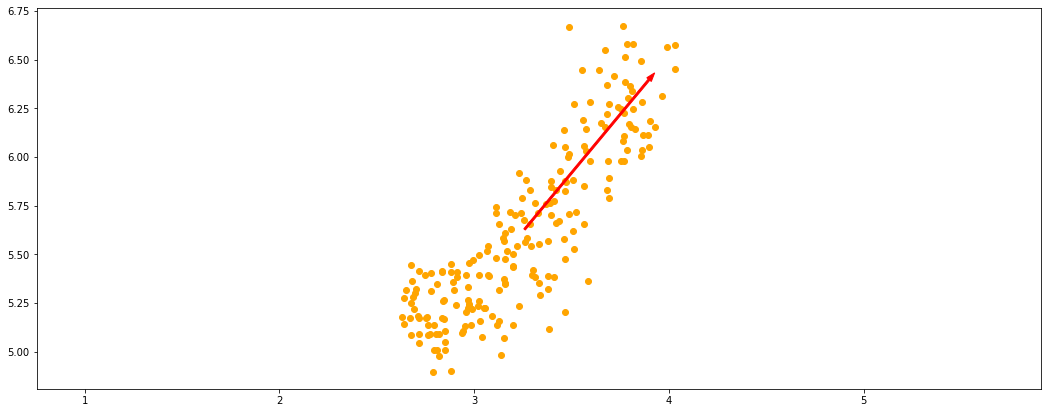

In [114]:
# Create a PCA instance: model
model = PCA()

# Fit model to points
model.fit(grains)

# Get the mean of the grain samples: mean
mean = model.mean_

# Get the first principal component: first_pc
first_pc = model.components_[0, :]

# Plot first_pc as an arrow, starting at mean
plt.figure(figsize = (18, 7))
plt.arrow(mean[0], mean[1], first_pc[0], first_pc[1], color = "red", width = 0.01)
plt.scatter(gw, gl, color = "orange")
# Keep axes on same scale
plt.axis("equal")
plt.show()

### Import Fish Dataset

In [115]:
fish = pd.read_csv("Fish.csv")
fish[::40]

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
40,Roach,0.0,19.0,20.5,22.8,6.4752,3.3516
80,Perch,85.0,17.8,19.6,20.8,5.1376,3.0368
120,Perch,900.0,37.0,40.0,42.5,11.7300,7.2250


In [116]:
samples = fish[fish.columns.drop("Species")]
varieties = fish["Species"]

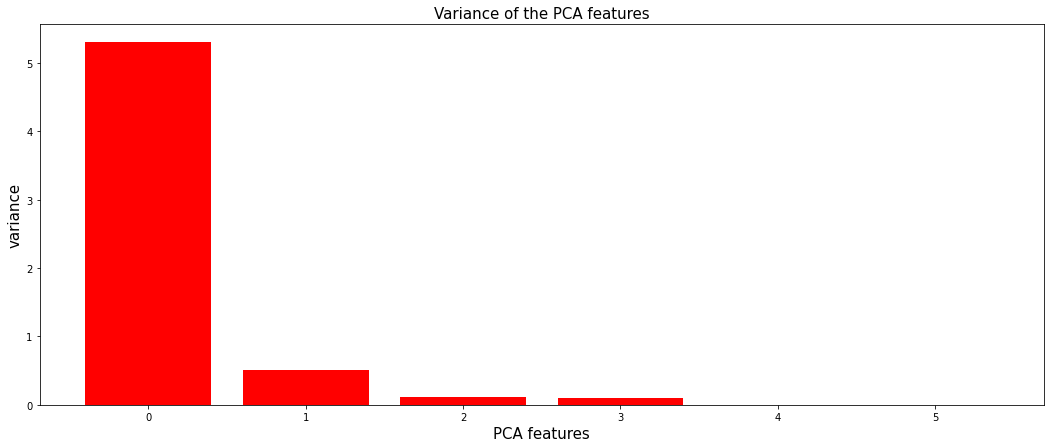

In [117]:
# Create scaler: scaler
scaler = StandardScaler()

# Create a PCA instance: pca
pca = PCA()


# Create pipeline: pipeline
pipeline = make_pipeline(scaler, pca)

# Fit the pipeline to 'samples'
pipeline.fit(samples)

# Plot the explained variances
features = range(pca.n_components_)

plt.figure(figsize = (18, 7))
plt.bar(features, pca.explained_variance_, color = "red")
plt.title("Variance of the PCA features", size = 15)
plt.xlabel("PCA features", size = 15)
plt.ylabel("variance", size = 15)
plt.xticks(features)
plt.show()

### Dimension reduction of the fish measurements

In [118]:
# Create a PCA model with 2 components: pca
pca = PCA(n_components = 2)

# Fit the PCA instance to the scaled samples
pca.fit(samples)

# Transform the scaled samples: pca_features
pca_features = pca.transform(samples)

# Print the shape of pca_features
print(pca_features.shape)

(159, 2)


### A tf-idf word-frequency array

In [119]:
documents = ['cats', 'chase', 'dogs', 'meow', 'say', 'woof', 'red', 'cats', 'blue', 'black', 'say', 'purple']

In [120]:
# Create a TfidfVectorizer: tfidf
tfidf = TfidfVectorizer()

# Apply fit_transform to document: csr_mat
csr_mat = tfidf.fit_transform(documents)

# Print result of toarray() method
print(csr_mat.toarray())

# Get the words: words
words = tfidf.get_feature_names()

print(words)

[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
['black', 'blue', 'cats', 'chase', 'dogs', 'meow', 'purple', 'red', 'say', 'woof']
